In [ ]:
import sqlite3
import pandas as pd
import plotly.express as px

conn = sqlite3.connect("states.db")


unemployment_df = pd.read_sql_query('SELECT * FROM "unemployment_rate"', conn)
establishments_df = pd.read_sql_query('SELECT * FROM "establishments"', conn)
survival_df = pd.read_sql_query('SELECT * FROM "survival_rates"', conn)

states_grouped = pd.read_sql_query('SELECT * FROM "states_grouped"', conn)

conn.close()



In [ ]:
latest_year_unemp = unemployment_df["Year"].iloc[-1]
fig_unemp = px.choropleth(
    unemployment_df,
    locations="State",
    locationmode="USA-states",
    color="Unemployment Rate",
    color_continuous_scale="Viridis",
    scope="usa",
    title=f"Unemployment Rate by State ({latest_year_unemp})"
)

establishments_df["Year"] = pd.to_numeric(establishments_df["Year"], errors="coerce")
establishments_df["Establishments"] = pd.to_numeric(establishments_df["Establishments"], errors="coerce")
latest_year_est = establishments_df["Year"].max()
establishments_df = establishments_df[establishments_df["Year"] == latest_year_est]


establishments_state = establishments_df.groupby("State")["Establishments"].sum().reset_index()

fig_est = px.choropleth(
    establishments_state,
    locations="State",
    locationmode="USA-states",
    color="Establishments",
    color_continuous_scale="Plasma",
    scope="usa",
    title=f"Total Establishments per State ({latest_year_est})"
)

survival_df["Year"] = pd.to_numeric(survival_df["Year"], errors="coerce")
survival_df["Survival Rates Since Birth"] = pd.to_numeric(survival_df["Survival Rates Since Birth"], errors="coerce")
latest_year_surv = survival_df["Year"].max()
survival_df = survival_df[survival_df["Year"] == latest_year_surv]


survival_state = survival_df.groupby("State")["Survival Rates Since Birth"].mean().reset_index()
survival_state_2 = states_grouped.mean(axis=0).reset_index()
survival_state_2.rename(columns={"index": "State", 0: "Survival Rate"}, inplace=True)

fig_surv = px.choropleth(
    survival_state_2,
    locations='State',
    locationmode="USA-states",
    color="Survival Rate",
    color_continuous_scale="Magma",
    scope="usa",
    title=f"Average Survival Rates by State ({latest_year_surv})"
)


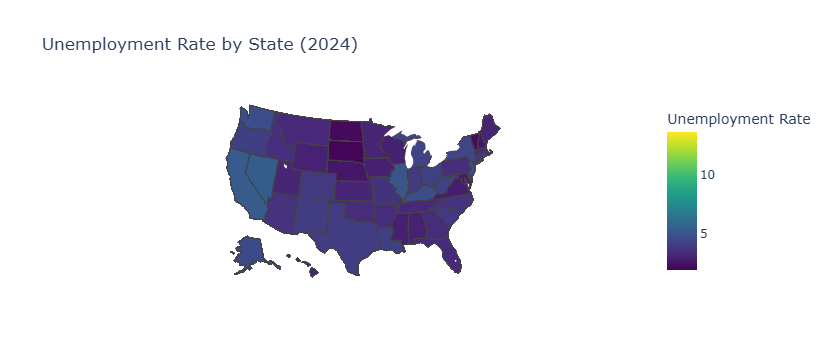

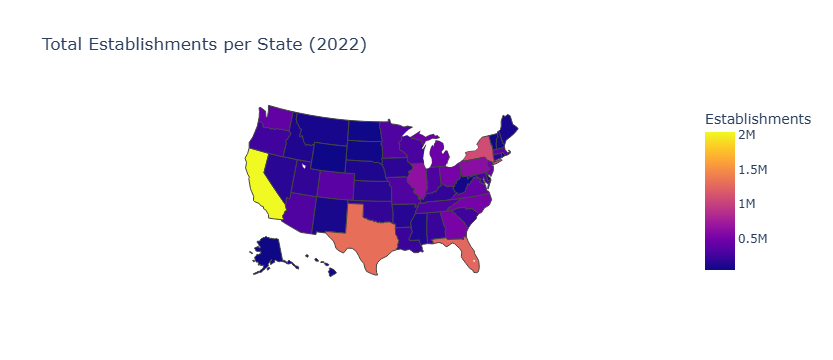

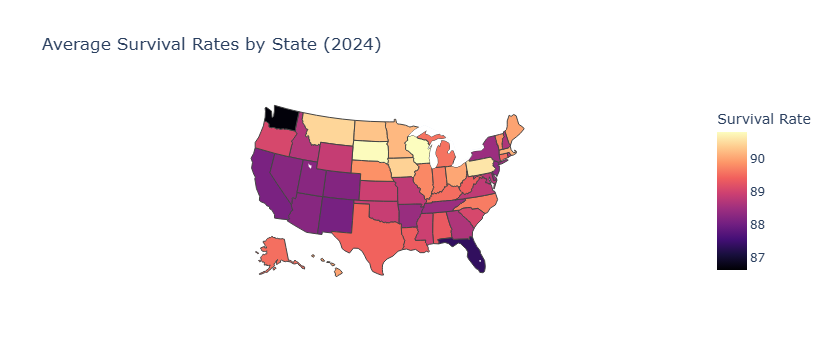

In [38]:

fig_unemp.show()
fig_est.show()
fig_surv.show()

conn.close()